<a href="https://colab.research.google.com/github/patrycjapiechowicz/Projects/blob/DataWorkshop/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy as sp
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython
from IPython import display
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
import random
import time
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('white')
plt.rcParams['figure.figsize'] = 12,8


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('titanic.train.csv')
test = pd.read_csv('titanic.test.csv')

In [5]:
data1=train.copy(deep=True)

In [6]:
combine_cleaner=[data1,test]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print('Train columns with null values:\n', data1.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print('Test columns with null values:\n', test.isnull().sum())

Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
for n in combine_cleaner:
    n['Age'].fillna(n['Age'].median(), inplace=True)
    n['Embarked'].fillna(n['Embarked']. mode()[0], inplace=True)
    n['Fare'].fillna(n['Fare'].median(), inplace=True)

In [11]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
data1['Age'].mean()

29.36158249158249

In [13]:
test['Age'].mean()

29.599282296650717

In [14]:
train['Age'].mean()

29.69911764705882

In [15]:
drop_colunms=['PassengerId', 'Ticket','Cabin']

In [16]:
data1.drop(drop_colunms, axis=1, inplace=True)

In [17]:
for n in combine_cleaner:
    n['Family members']=n['SibSp']+n['Parch']+1

In [18]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family members
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [19]:
for n in combine_cleaner:
    n['IsAlone']=1
    n['IsAlone'].loc[n['Family members']>1]=0

In [20]:
for n in combine_cleaner:
    n['Title'] = n['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [21]:
for n in combine_cleaner:
    n['Farebin']=pd.qcut(n['Fare'],4)

In [22]:
for n in combine_cleaner:
    n['Agebin']=pd.cut(n['Age'].astype(int),5)

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Pclass          891 non-null    int64   
 2   Name            891 non-null    object  
 3   Sex             891 non-null    object  
 4   Age             891 non-null    float64 
 5   SibSp           891 non-null    int64   
 6   Parch           891 non-null    int64   
 7   Fare            891 non-null    float64 
 8   Embarked        891 non-null    object  
 9   Family members  891 non-null    int64   
 10  IsAlone         891 non-null    int64   
 11  Title           891 non-null    object  
 12  Farebin         891 non-null    category
 13  Agebin          891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB


In [24]:
title_names = (data1['Title'].value_counts()>10)

In [25]:
title_names

Mr               True
Miss             True
Mrs              True
Master           True
Dr              False
Rev             False
Mlle            False
Major           False
Col             False
the Countess    False
Capt            False
Ms              False
Sir             False
Lady            False
Mme             False
Don             False
Jonkheer        False
Name: Title, dtype: bool

In [26]:
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() > stat_min) #this will create a true false series with title name as index

In [27]:
 title_names

Mr               True
Miss             True
Mrs              True
Master           True
Dr              False
Rev             False
Mlle            False
Major           False
Col             False
the Countess    False
Capt            False
Ms              False
Sir             False
Lady            False
Mme             False
Don             False
Jonkheer        False
Name: Title, dtype: bool

In [28]:

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == False else x)


In [29]:
data1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Misc'], dtype=object)

In [30]:
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/


title_names = (test['Title'].value_counts() > 10) #this will create a true false series with title name as index
title_names



Mr         True
Miss       True
Mrs        True
Master     True
Col       False
Rev       False
Ms        False
Dr        False
Dona      False
Name: Title, dtype: bool

In [31]:

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
test['Title'] = test['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == False else x)


In [32]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64

In [33]:
label=LabelEncoder()
for n in combine_cleaner:
    n['Sex_code']=label.fit_transform(n['Sex'])
    n['Embarked_code']=label.fit_transform(n['Embarked'])
    n['Title_code']=label.fit_transform(n['Title'])
    n['Agebin_code']=label.fit_transform(n['Agebin'])
    n['Farebin_code']=label.fit_transform(n['Farebin'])

In [34]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family members', 'IsAlone', 'Title', 'Farebin', 'Agebin',
       'Sex_code', 'Embarked_code', 'Title_code', 'Agebin_code',
       'Farebin_code'],
      dtype='object')

In [35]:
target=['Survived']

In [36]:
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'Family members', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_code','Pclass', 'Embarked_code', 'Title_code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation

In [37]:
data1_xy =  str(target) + str(data1_x)

In [38]:
data1_xy

"['Survived']['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'Family members', 'IsAlone']"

In [39]:
data1_x_bin = ['Sex_code','Pclass', 'Embarked_code', 'Title_code', 'Family members', 'Agebin_code', 'Farebin_code']
data1_xy_bin = target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

Bin X Y:  ['Survived', 'Sex_code', 'Pclass', 'Embarked_code', 'Title_code', 'Family members', 'Agebin_code', 'Farebin_code'] 



In [40]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Family members', 'IsAlone', 'Title', 'Farebin', 'Agebin',
       'Sex_code', 'Embarked_code', 'Title_code', 'Agebin_code',
       'Farebin_code'],
      dtype='object')

In [41]:
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Family members', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



In [42]:
data1_x_bin

['Sex_code',
 'Pclass',
 'Embarked_code',
 'Title_code',
 'Family members',
 'Agebin_code',
 'Farebin_code']

In [43]:
data1_dummy

,Pclass,SibSp,Parch,Age,Fare,Family members,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,27.0,13.0000,1,1,0,1,0,0,1,0,1,0,0,0
887,1,0,0,19.0,30.0000,1,1,1,0,0,0,1,0,0,1,0,0
888,3,1,2,28.0,23.4500,4,0,1,0,0,0,1,0,0,1,0,0
889,1,0,0,26.0,30.0000,1,1,0,1,1,0,0,0,0,0,1,0


In [44]:
data1.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Family members    0
IsAlone           0
Title             0
Farebin           0
Agebin            0
Sex_code          0
Embarked_code     0
Title_code        0
Agebin_code       0
Farebin_code      0
dtype: int64

In [45]:
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Family members    0
IsAlone           0
Title             0
Farebin           0
Agebin            0
Sex_code          0
Embarked_code     0
Title_code        0
Agebin_code       0
Farebin_code      0
dtype: int64

In [46]:
data1.shape

(891, 19)

In [47]:
test.shape

(418, 20)

In [48]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[target], random_state = 0)

In [49]:
data1_x_calc

['Sex_code',
 'Pclass',
 'Embarked_code',
 'Title_code',
 'SibSp',
 'Parch',
 'Age',
 'Fare']

In [50]:
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[target], random_state = 0)

In [51]:
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Pclass          891 non-null    int64   
 2   Name            891 non-null    object  
 3   Sex             891 non-null    object  
 4   Age             891 non-null    float64 
 5   SibSp           891 non-null    int64   
 6   Parch           891 non-null    int64   
 7   Fare            891 non-null    float64 
 8   Embarked        891 non-null    object  
 9   Family members  891 non-null    int64   
 10  IsAlone         891 non-null    int64   
 11  Title           891 non-null    object  
 12  Farebin         891 non-null    category
 13  Agebin          891 non-null    category
 14  Sex_code        891 non-null    int64   
 15  Embarked_code   891 non-null    int64   
 16  Title_code      891 non-null    int64   
 17  Agebin_code     

In [ ]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
   

In [54]:
print(pd.crosstab(data1['Title'],data1[target[0]]))

Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


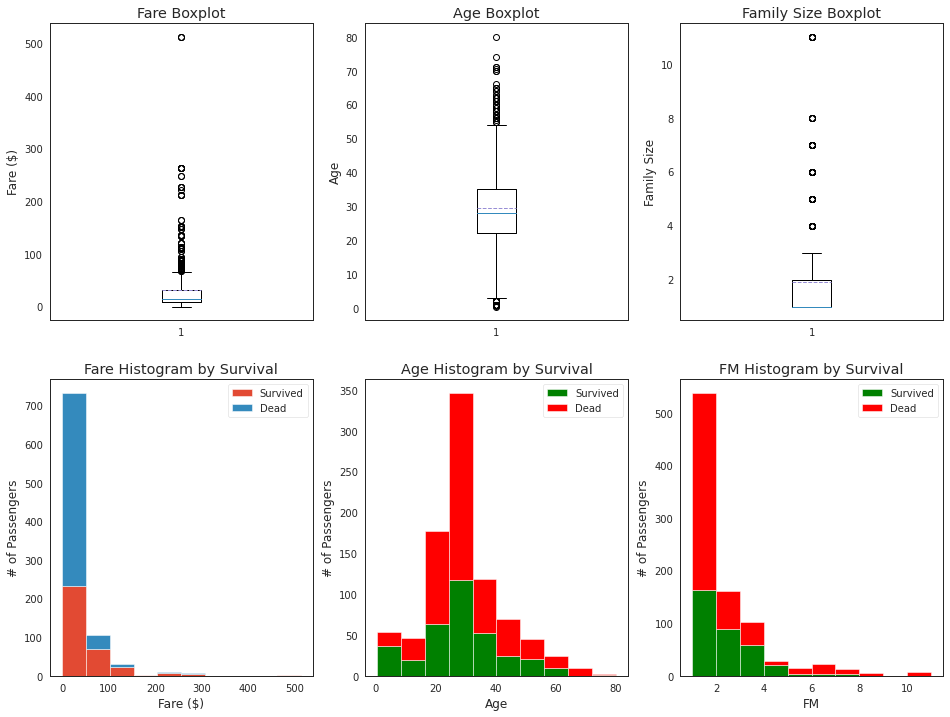

In [55]:
plt.figure(figsize=(16,12))

plt.subplot(231)
plt.boxplot(data1['Fare'],showmeans = True, meanline = True
           )
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'],showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(data1['Family members'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size')


plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']],stacked=True,label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['Family members'], data1[data1['Survived']==0]['Family members']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('FM Histogram by Survival')
plt.xlabel('FM')
plt.ylabel('# of Passengers')
plt.legend()

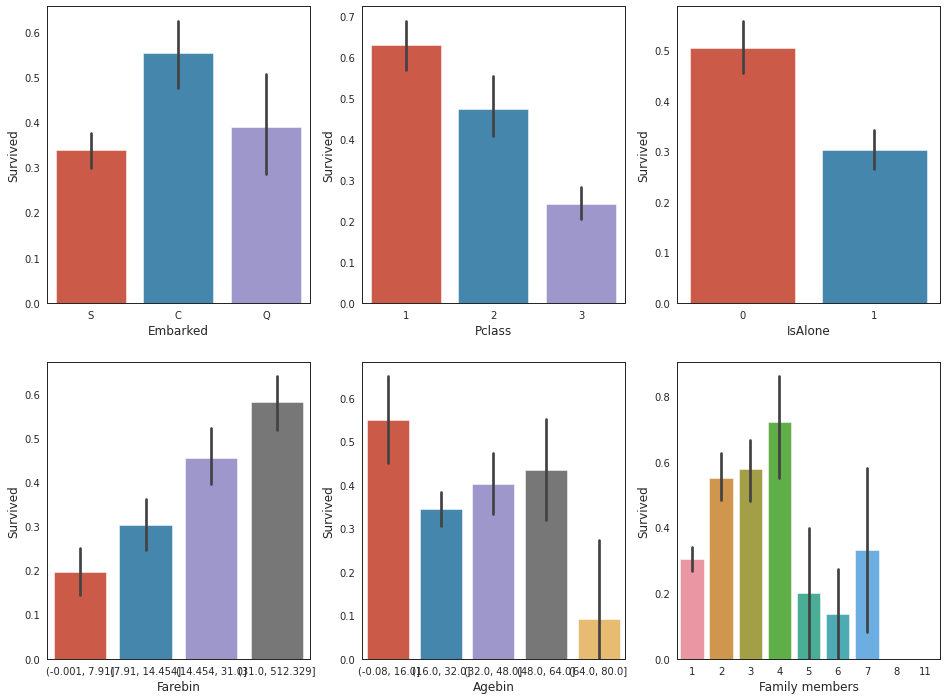

In [56]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(data=data1, x='Embarked', y='Survived',ax = saxis[0,0])
sns.barplot(data=data1, x='Pclass', y='Survived',ax = saxis[0,1])
sns.barplot(data=data1, x='IsAlone', y='Survived',ax = saxis[0,2])
sns.barplot(data=data1, x='Farebin', y='Survived',ax = saxis[1,0])
sns.barplot(data=data1, x='Agebin', y='Survived',ax = saxis[1,1])
sns.barplot(data=data1, x='Family members', y='Survived',ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

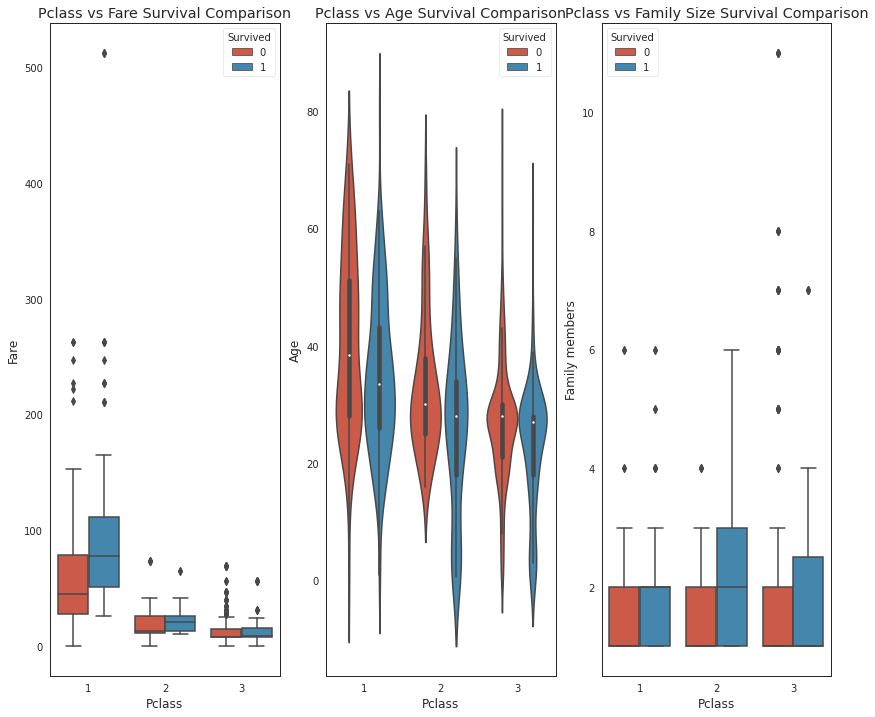

In [57]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))
sns.boxplot( 'Pclass','Fare', hue='Survived', data=data1, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot('Pclass', 'Age', hue='Survived', data=data1, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot('Pclass', 'Family members',  hue='Survived', data=data1, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

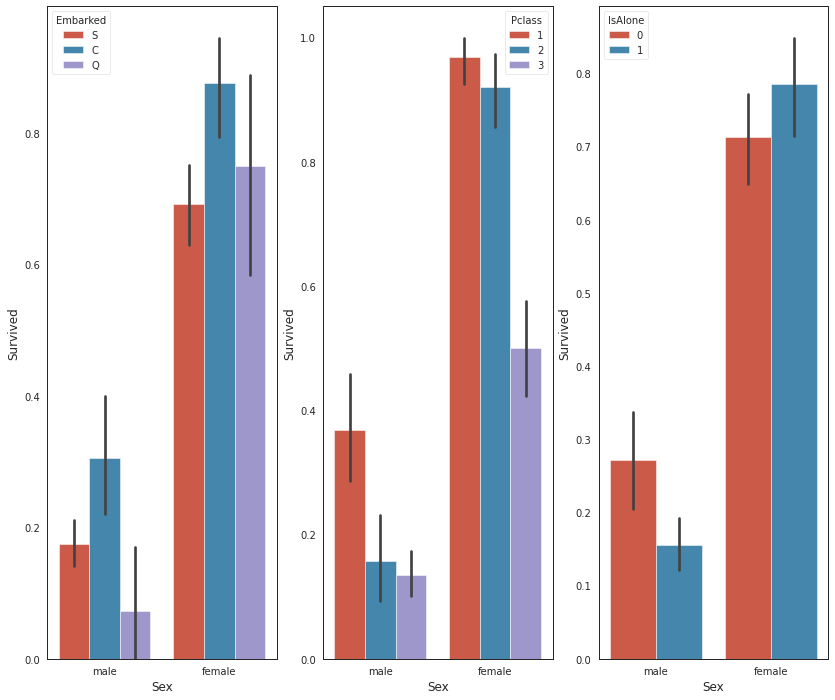

In [58]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))
sns.barplot('Sex', 'Survived', hue='Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot('Sex', 'Survived', hue='Pclass', data=data1, ax = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot('Sex', 'Survived', hue='IsAlone', data=data1, ax = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

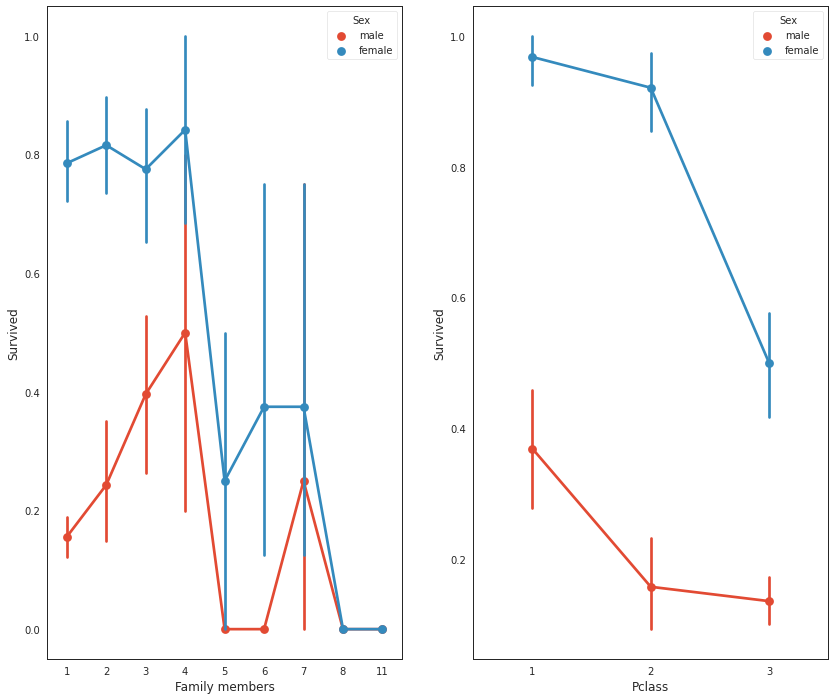

In [60]:
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))
sns.pointplot('Family members', 'Survived', hue='Sex', data=data1, ax=maxis1 )

sns.pointplot('Pclass', 'Survived', hue='Sex', data=data1, ax=maxis2 );

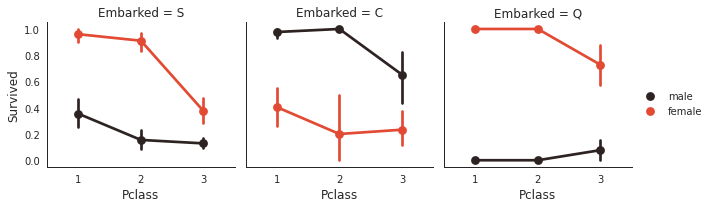

In [61]:
g=sns.FacetGrid(data1,col='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend();

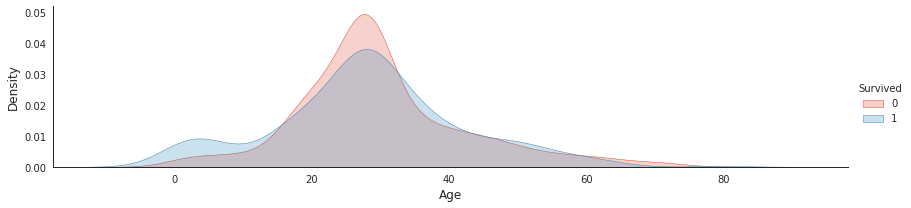

In [62]:
g=sns.FacetGrid(data1, hue='Survived',aspect=4)
g.map(sns.kdeplot, 'Age',shade=True)
g.add_legend();

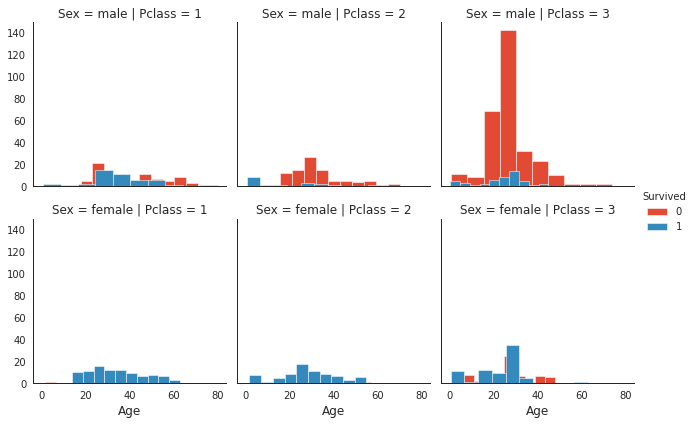

In [63]:
g=sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
g.map(plt.hist, 'Age')
g.add_legend();

In [64]:
corr=data1.corr()

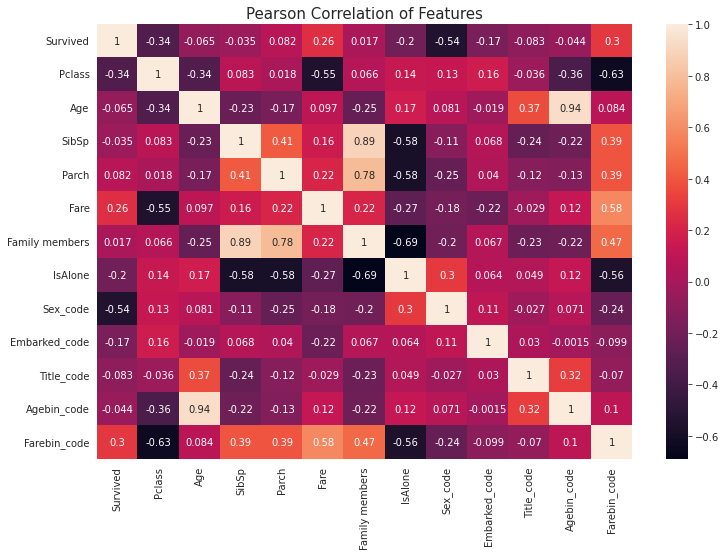

In [66]:
sns.heatmap(corr,annot=True)
plt.title('Pearson Correlation of Features', y=1.05, size=15);

In [67]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [68]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),#SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
]

In [69]:
cv_split=model_selection.ShuffleSplit(n_splits=10,test_size=.3,train_size=.6, random_state=0)

In [70]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']

In [71]:
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [72]:
MLA_predict = data1[target]

In [73]:
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[target], cv  = cv_split)
    
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['score_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    alg.fit(data1[data1_x_bin], data1[target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)


In [74]:
cv_results

{'fit_time': array([0.0209558 , 0.0021894 , 0.00219131, 0.0020175 , 0.00202632,
        0.00200891, 0.00199771, 0.00212216, 0.00196576, 0.00199771]),
 'score_time': array([0.00205827, 0.00161314, 0.00160217, 0.00163817, 0.00150895,
        0.00150037, 0.00152779, 0.00155973, 0.00154424, 0.00149059]),
 'test_score': array([0.80223881, 0.76119403, 0.83208955, 0.7761194 , 0.82462687,
        0.82462687, 0.7761194 , 0.79850746, 0.83208955, 0.84328358])}

In [75]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.005864,0.827612,0.040916,0.046063
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.006165,0.826119,0.045663,0.052065
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.023046,0.825373,0.076382,0.23036
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.027538,0.823881,0.063481,0.200716
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.004296,0.822761,0.049873,0.145906
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.00148,0.822015,0.052755,0.003282
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.009304,0.822015,0.066799,0.052988
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.01732,0.81194,0.049861,0.096435
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.021163,0.810448,0.049254,0.424476
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.001328,0.808955,0.076054,0.002685


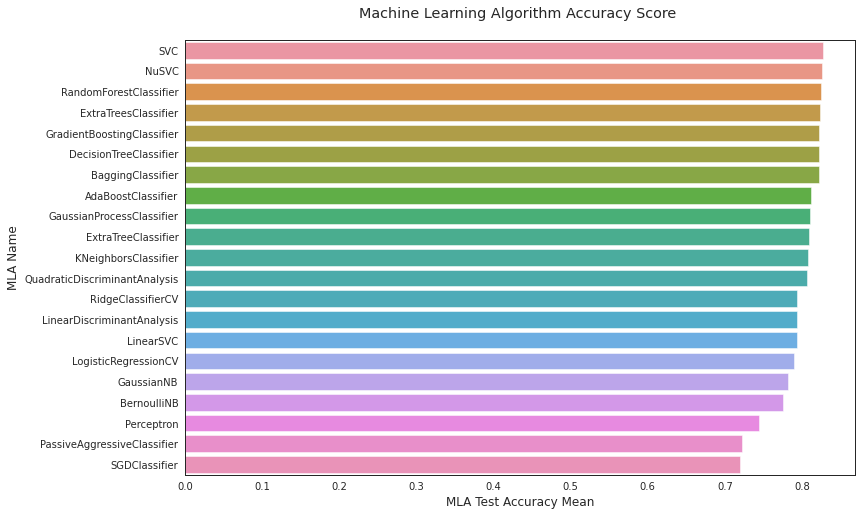

In [76]:
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
sns.barplot('MLA Test Accuracy Mean', 'MLA Name', data=MLA_compare);